# Bank Marketing Project

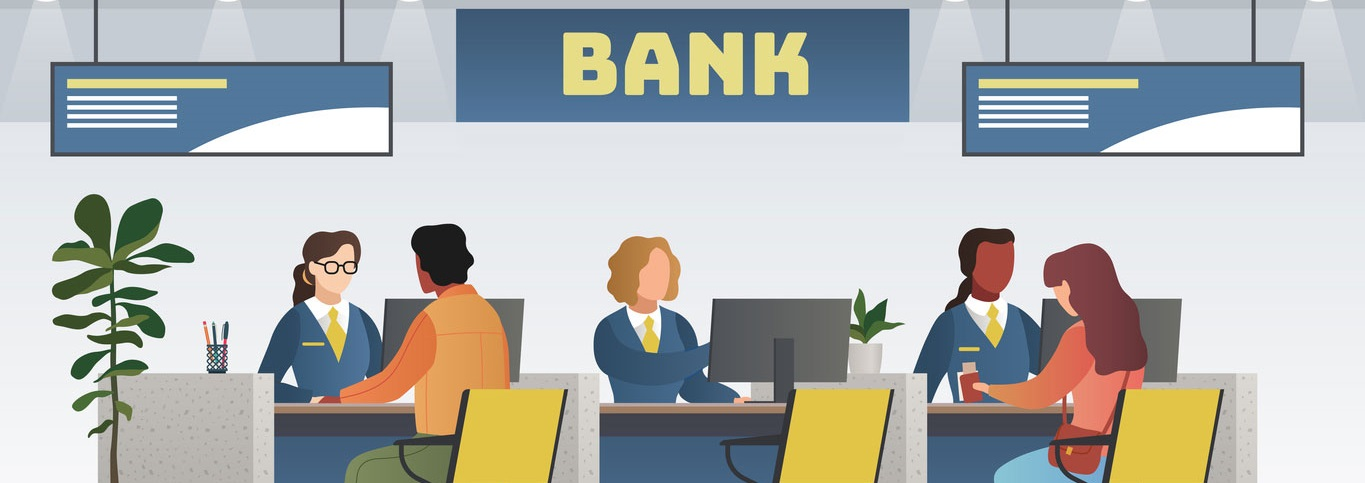

Dataset:  

The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. 
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients.



Input variables:  

    •	ID: Unique client ID
    •	age: Age of the client
    •	job: Type of job
    •	marital: Marital status of the client
    •	education: Education level
    •	default: Credit in default
    •	balance: Bank account balance
    •	housing: Housing loan
    •	loan: Personal loan
    •	contact: Type of communication
    •	month: Contact month
    •	day_of_week: Day of week of contact
    •	duration: Contact duration
    •	campaign: number of contacts performed during this campaign to the client
    •	pdays: number of days that passed by after the client was last contacted
    •	previous: number of contacts performed before this campaign
    •	poutcome: outcome of the previous marketing campaign
 

Output variable:   

    •	Subscribed (target): has the client subscribed a term deposit? (YES/NO)
 

Aim: 

    Develop a machine learning model to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not (Classification model)

In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [177]:
# load train data

bank_train_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')
bank_train_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


# Data pre-processing & EDA

In [179]:
bank_train_df.shape

(31647, 18)

In [180]:
bank_test_df.shape

(13564, 17)

In [181]:
bank_train_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observations:  
    The mean bank balance is 1363 and standard deviation is 3028. A larger standard deviation suggests that few accounts have much higher balances than the average balance.  
    

In [182]:
bank_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [183]:
bank_train_df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

Observations:  
There are no nulls in the dataset   
There are 10 columns with object datatype and 8 with int64 datatype

In [184]:
# create a copy of dataset for editing
bank_train_df1=bank_train_df.copy()

In [185]:
# drop id
bank_train_df1.drop('ID',axis=1,inplace=True)

In [186]:
# checking for duplicates
duplicates=bank_train_df1.duplicated()
print(f'Number of duplicates in the dataset: {duplicates.sum()}')

Number of duplicates in the dataset: 0


In [187]:
bank_train_df1.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [188]:
# counting unique values in each column

for i in bank_train_df1.columns:
    print(bank_train_df1[i].value_counts())

age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64
job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64
marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64
default
no     31062
yes      585
Name: count, dtype: int64
balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120       1
-713         1
-905         1
 4722        1
 2968        1
Name: count, Length: 6326, dtype: int64
housing
yes    17584
no     14063
Name: count, dtype: int64
loan
no   

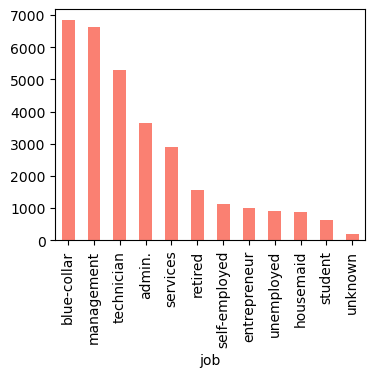

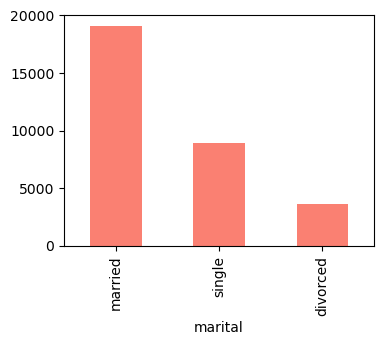

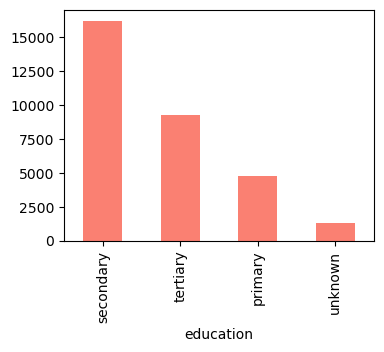

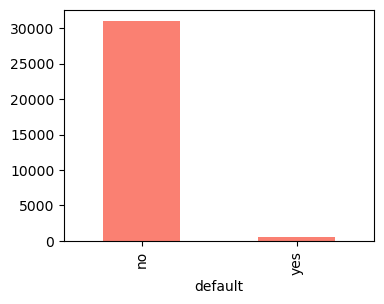

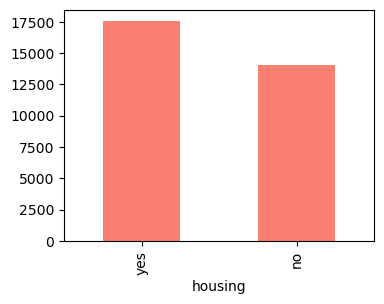

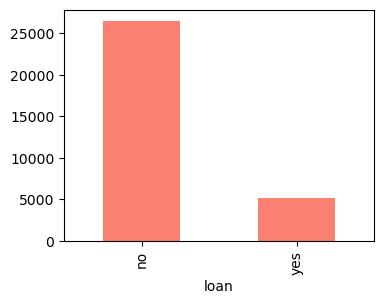

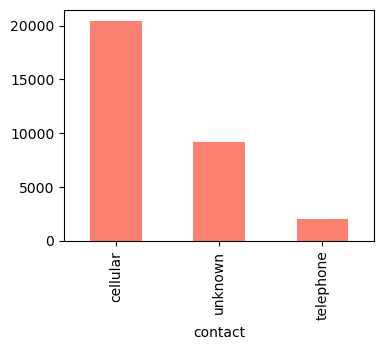

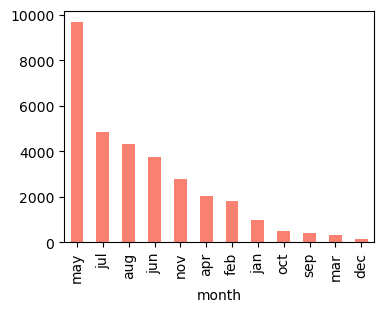

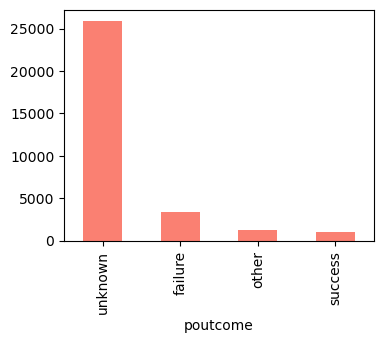

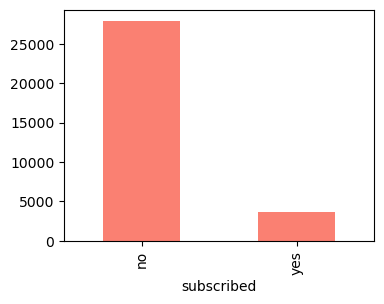

In [189]:
# analyse categorical features

categorical=bank_train_df1.select_dtypes(include='object')

for col in categorical.columns:
    plt.figure(figsize=(4,3))
    categorical[col].value_counts().plot(kind='bar',color='salmon')
    plt.xlabel(col)

plt.show()

Observations:  

    Majority bank accounts are held by clients who are employed in blue-collar and management job types.    
    Married clients are found to be holding more accounts than single/divorced clients.    
    People with secondary education holds most of the bank accounts.  
    Majority clients have no credit in default.  
    Housing loans are more common than personal loans.  
    Majority clients do not hold personal loans.  
    The preferred contact method is cellular phone than others.  
    Highest number of calls were made in the month of May.  
    Its difficult to analyse the outcome of the previous marketing campaign as it failed to capture data effectively.  
    Majority clients have not subscribed to a term deposit.  


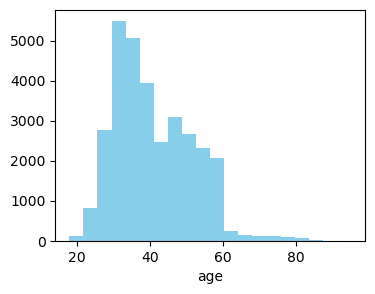

Most frequently occuring value in age column : 32


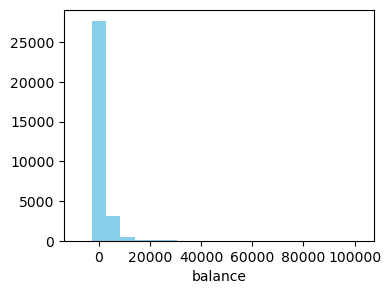

Most frequently occuring value in balance column : 0


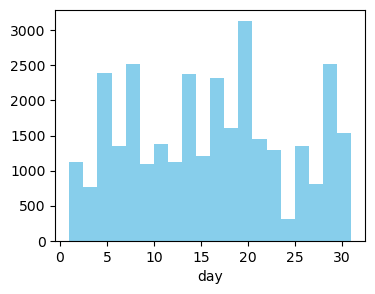

Most frequently occuring value in day column : 20


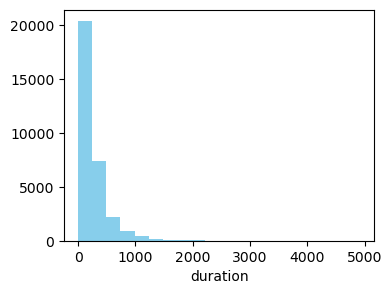

Most frequently occuring value in duration column : 90


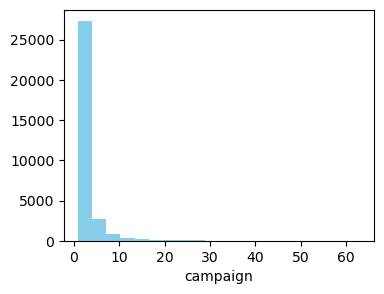

Most frequently occuring value in campaign column : 1


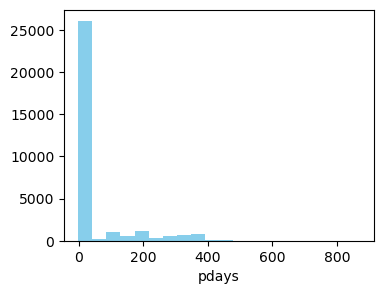

Most frequently occuring value in pdays column : -1


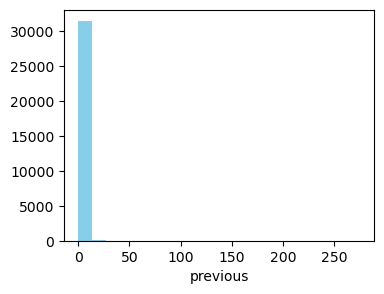

Most frequently occuring value in previous column : 0


In [190]:
# analyse numerical features

numerical=bank_train_df1.select_dtypes(include='int64')

for col in numerical.columns:
    plt.figure(figsize=(4,3))
    plt.hist(numerical[col], color='skyblue',bins=20)
    plt.xlabel(col)
    plt.show()
    
    print(f'Most frequently occuring value in {col} column : {numerical[col].mode().iloc[0]}' )

Observations:  

        Majority of the clients fall in the younger age (32 years old)  
        Bank balance of majority clients is 0  
        Most calls to the clients were made on 20th  
        The call duration was not much longer in most of the cases (majority calls were completed in 90 seconds)  
        Clients were mostly contacted once during this campaign    
        Most of the clients were not contacted before this campaign  


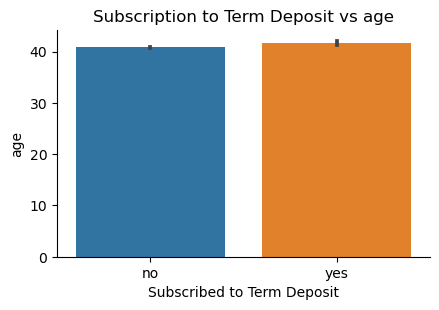

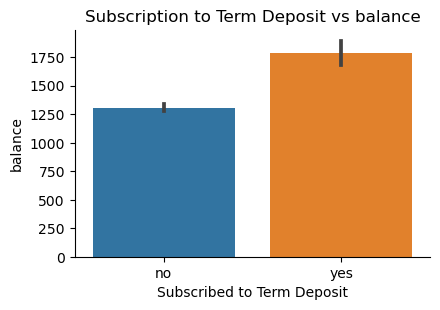

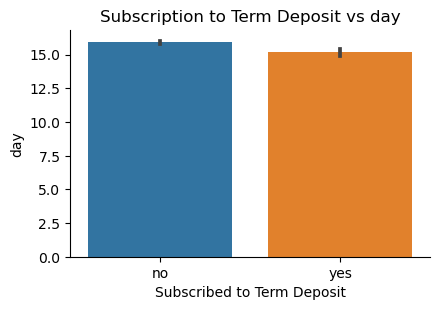

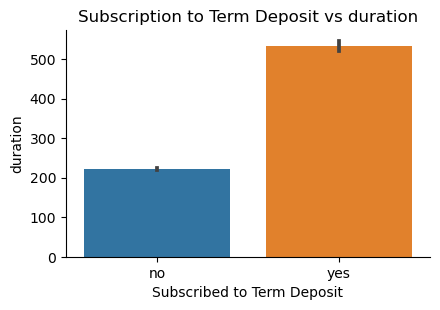

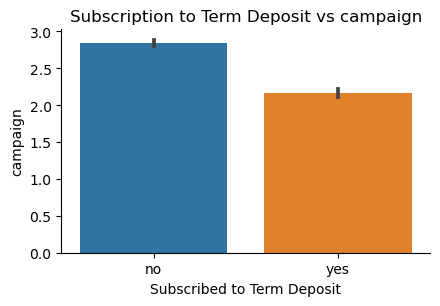

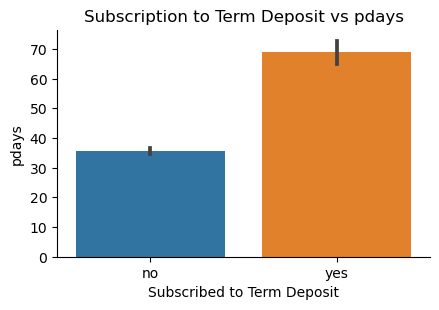

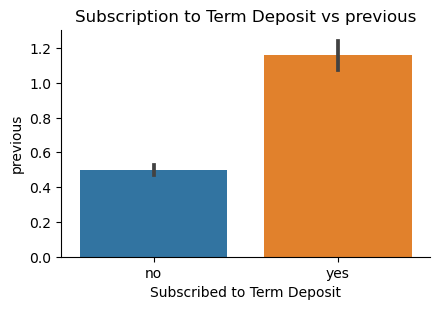

In [191]:
# plot subscription of clients with other features

for i in numerical.columns:
    sns.catplot(x='subscribed',y=i,data=bank_train_df1,height=3,aspect=1.5,kind='bar')
    plt.xlabel('Subscribed to Term Deposit')
    plt.ylabel(i)
    plt.title(f'Subscription to Term Deposit vs {i}')

Observations:  

       Subscription pattern is similar across both genders   
       Clients with more bank balance tends to subscribe to term deposit more  
       Subscription show no particular trends with day of contacting the client  
       Clients with subscription tend to have longer call duration compared to those who didnt have subscription  
       The clients with subscriptions were contacted less frequently during and after the campaign  
       The clients with subscriptions were contacted more frequently before the campaign

In [192]:
bank_train_df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [193]:
# encode label column

encoded_subscribed=[]
for i in bank_train_df1['subscribed']:
    if i=='yes':
        encoded_subscribed.append(1)
    else:
        encoded_subscribed.append(0)
bank_train_df1.drop('subscribed',axis=1,inplace=True)
bank_train_df1['subscribed_encoded']=encoded_subscribed
bank_train_df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_encoded
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [194]:
categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'subscribed'],
      dtype='object')

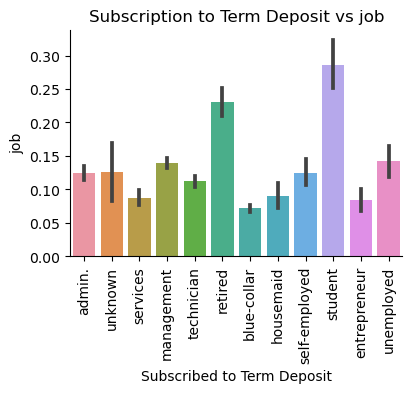

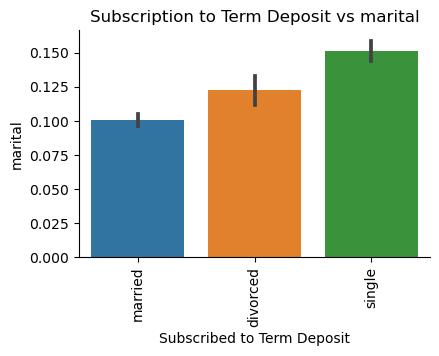

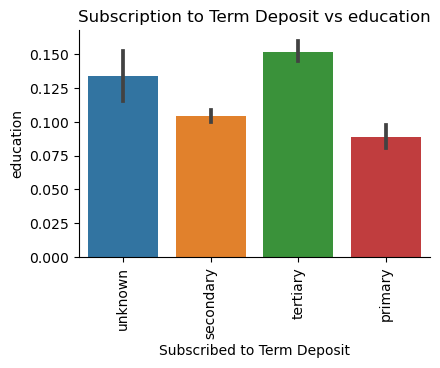

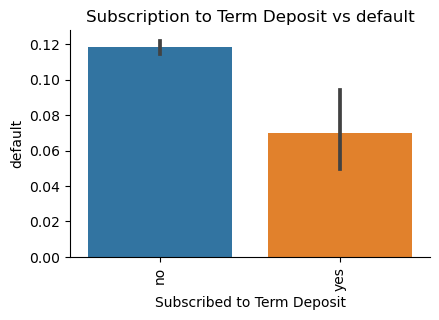

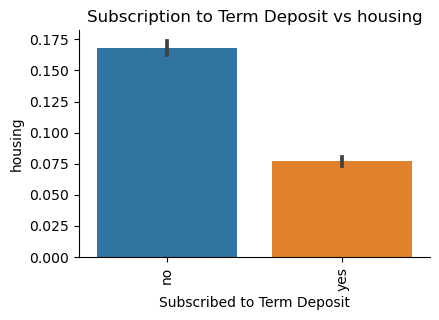

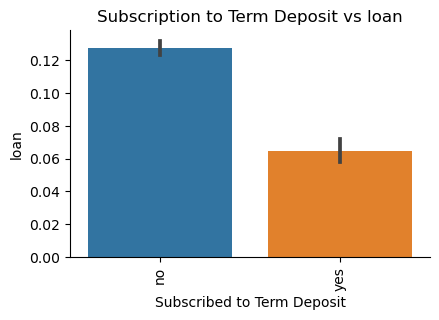

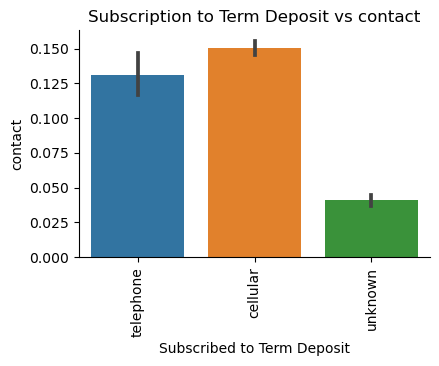

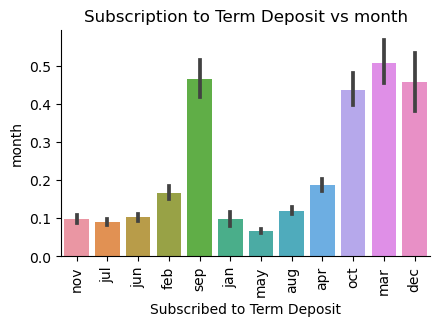

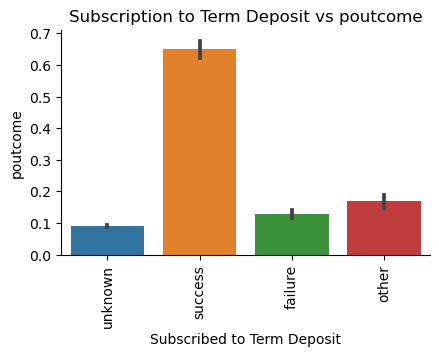

In [195]:
# plot subscription of clients with other features

categorical=bank_train_df1.select_dtypes(include='object')
for i in categorical.columns:
    sns.catplot(x=i,y='subscribed_encoded',data=bank_train_df1,height=3,aspect=1.5,kind='bar')
    plt.xlabel('Subscribed to Term Deposit')
    plt.ylabel(i)
    plt.xticks(rotation=90)
    plt.title(f'Subscription to Term Deposit vs {i}')
    plt.show()

Observations:  

       Students have more subscription to term deposits followed by retired people. Blue-collared employees have the least number of subscriptions even though they hold the maximum number of bank accounts  
       Single clients have more subscription to term deposits than married clients  
       Clients with tertiary education have more subscriptions
       Clients with no credit defaults have more subscriptions  
       Clients with no housing and personal loans have more subscriptions  
       Clients who were contacted on March have the most subscriptions   
       Larger proportion of clients who were contacted for the campaign has successfully subscribed to term deposits  
       

In [196]:
bank_train_df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed_encoded'],
      dtype='object')

In [197]:
categorical.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object')

In [198]:
# create a copy of bank_train_df1 to make the label encoding

bank_train_df2=bank_train_df1.copy()

In [199]:
# encode categorical_features for viewing data distribution

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
    
categorical=bank_train_df2.select_dtypes(include='object')
for i in categorical.columns:
    bank_train_df2[i]=le.fit_transform(bank_train_df2[i])
        
bank_train_df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_encoded
0,56,0,1,3,0,1933,0,0,1,19,9,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,5,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,5,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,3,380,1,-1,0,3,0


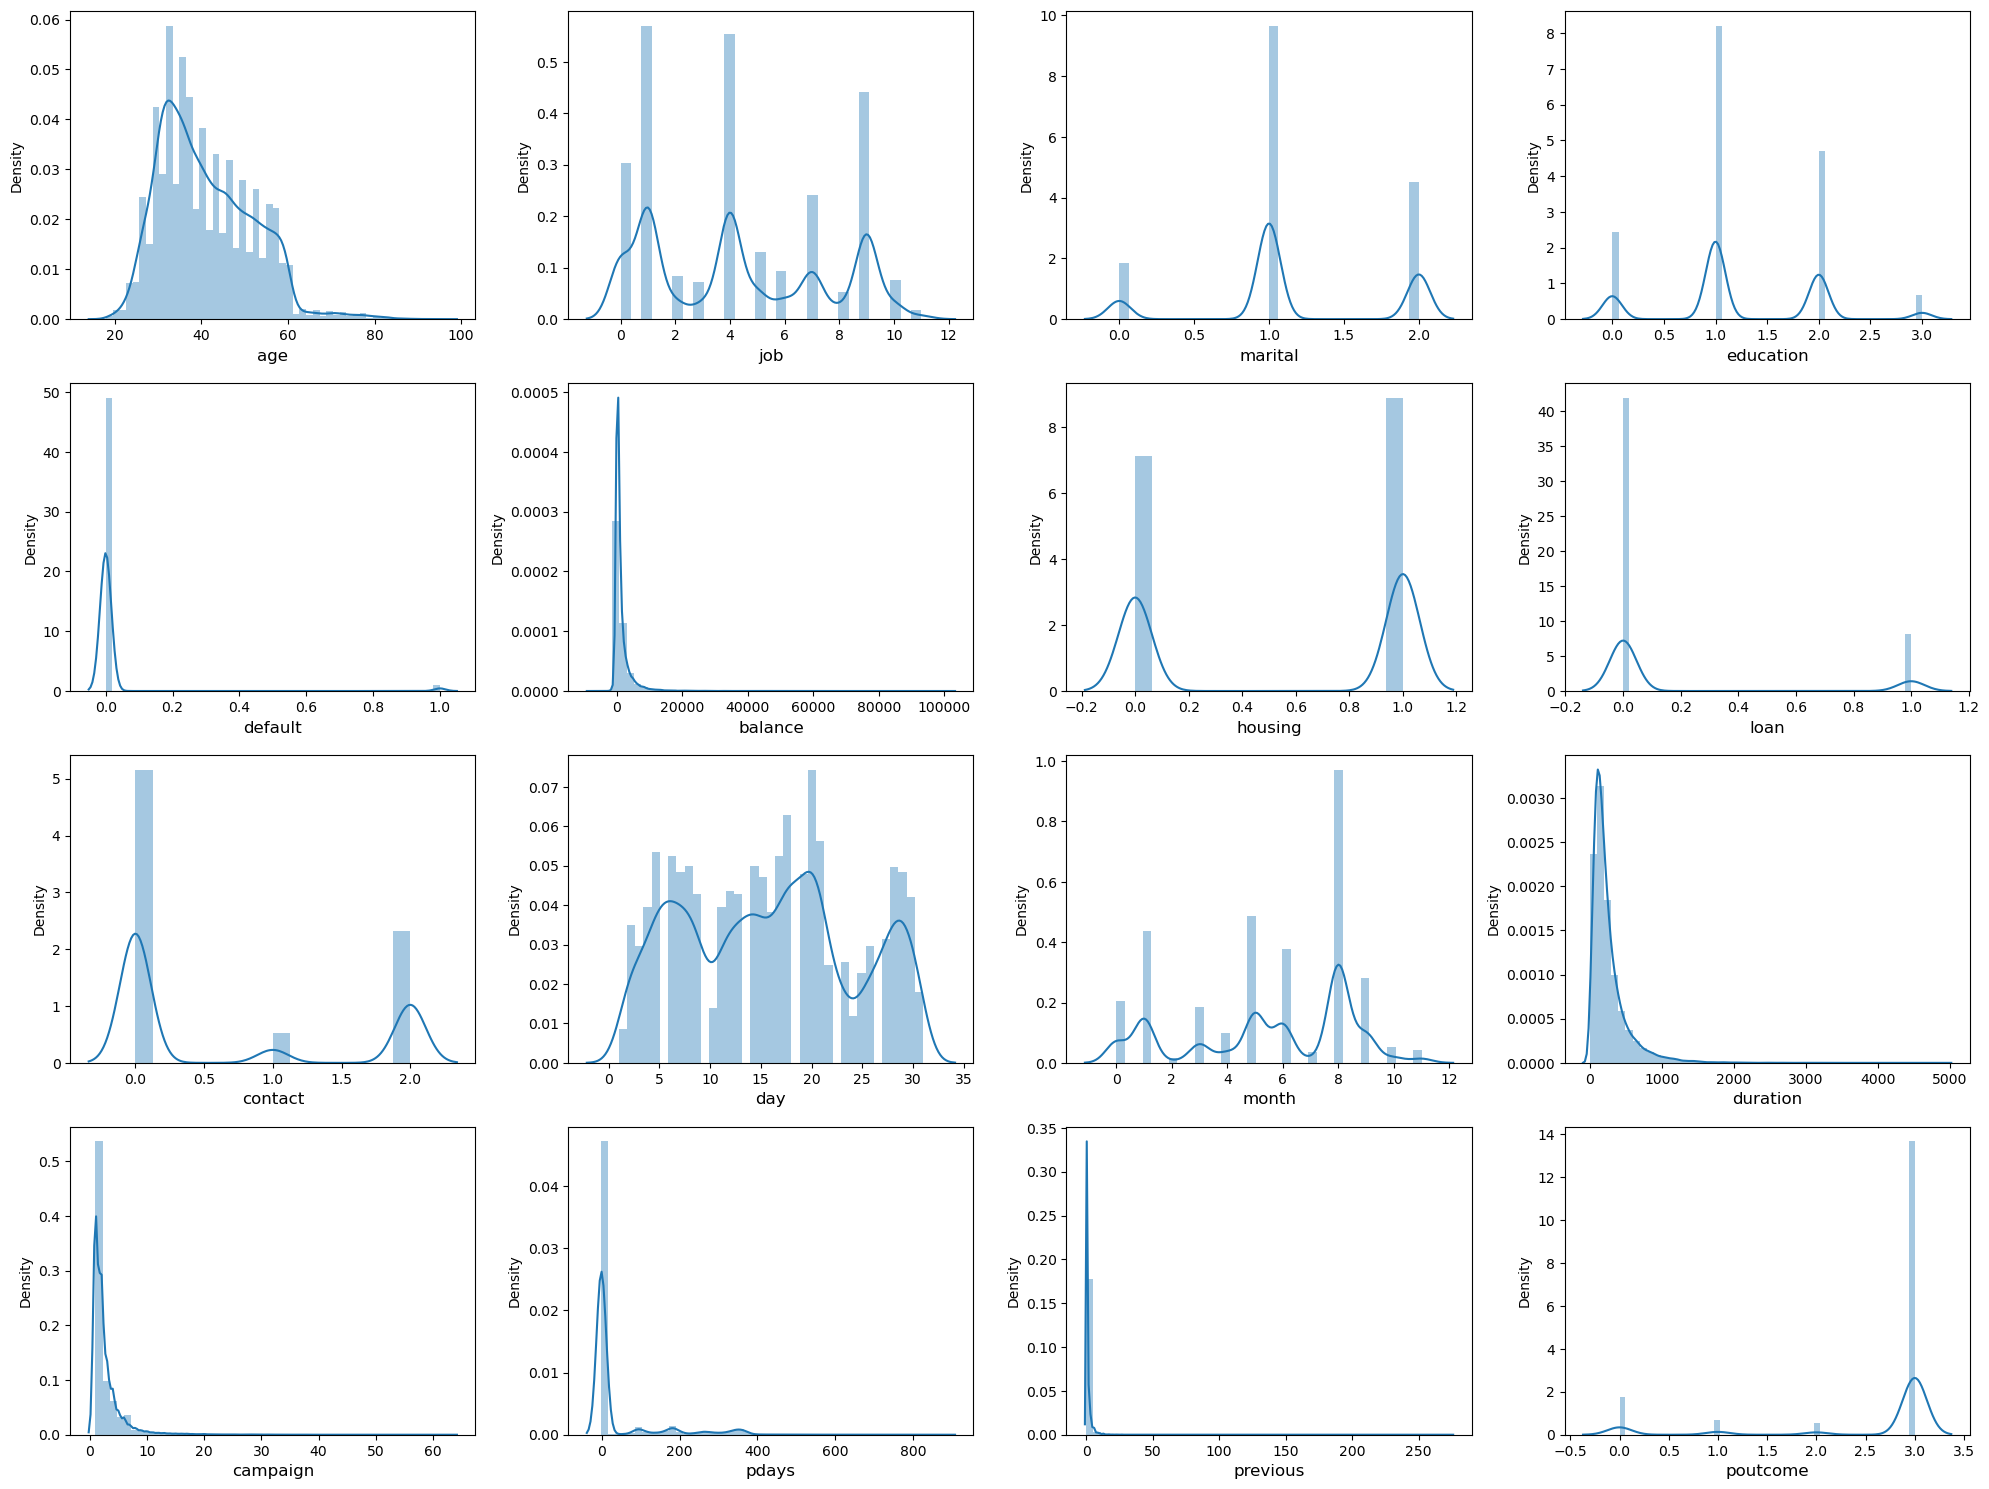

In [200]:
# check data distribution

x=bank_train_df2.drop('subscribed_encoded',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=16:
        ax=plt.subplot(4,4,plot)
        sns.distplot(x[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

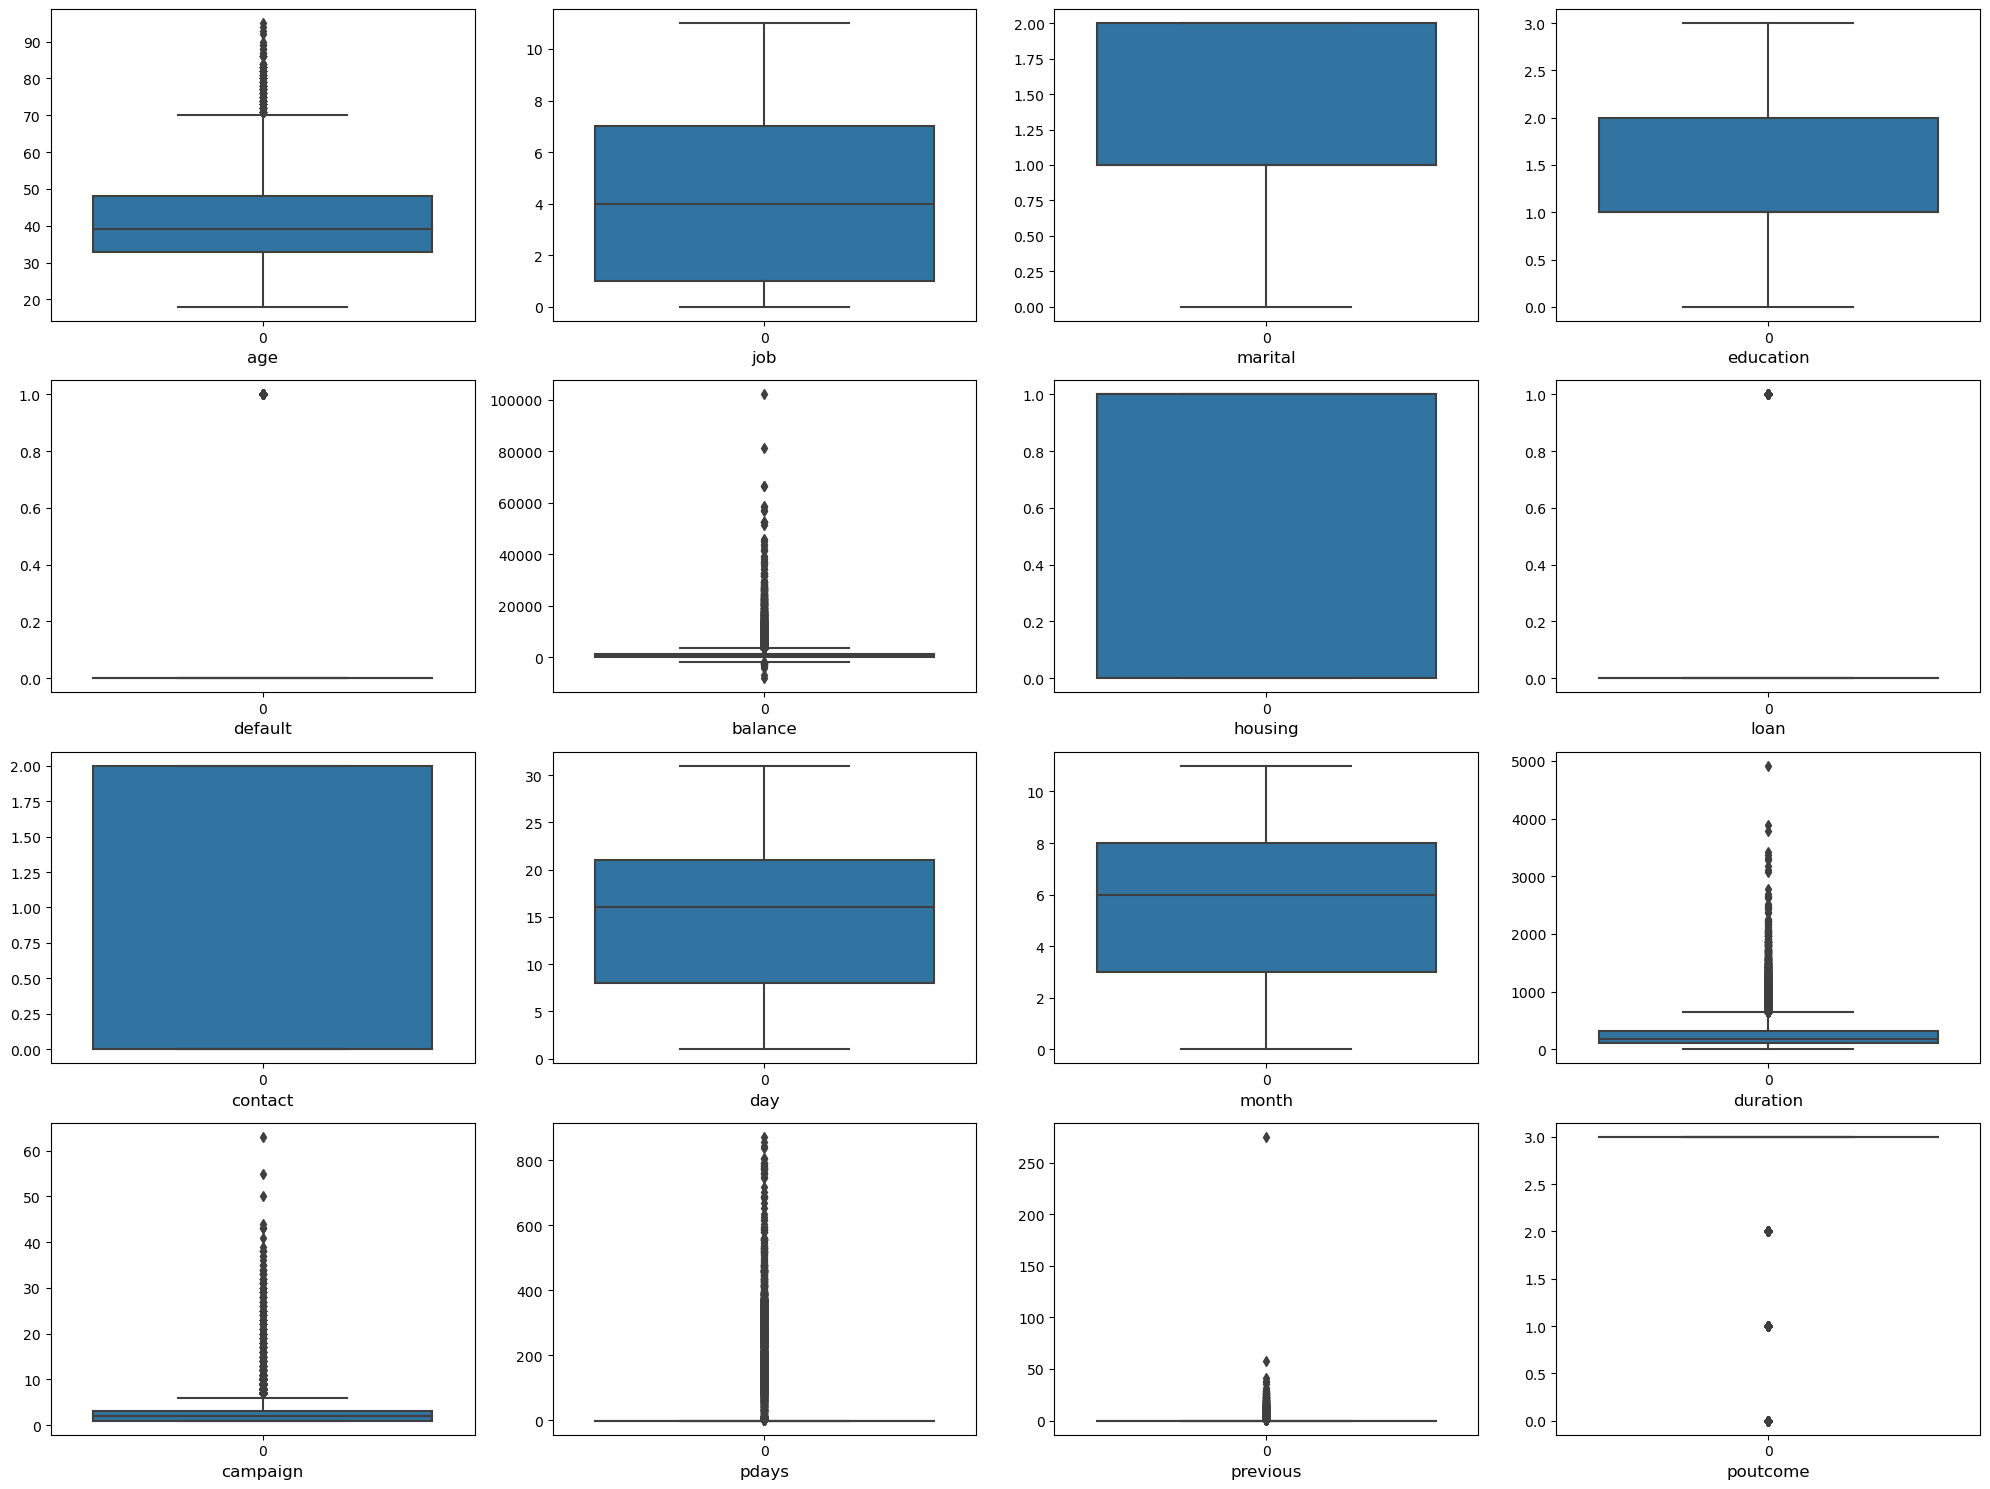

In [202]:
# check data distribution

x=bank_train_df2.drop('subscribed_encoded',axis=1)
plt.figure(figsize=(20,15))
plot=1
for col in x:
    if plot<=16:
        ax=plt.subplot(4,4,plot)
        sns.boxplot(x[col])
        plt.xlabel(col,fontsize=12)
    plot+=1
plt.tight_layout()

Observations:  

       There are outliers and skewness in the dataset but data is not removed here as the outlier data can be possible in real time situations.

# Feature Selection

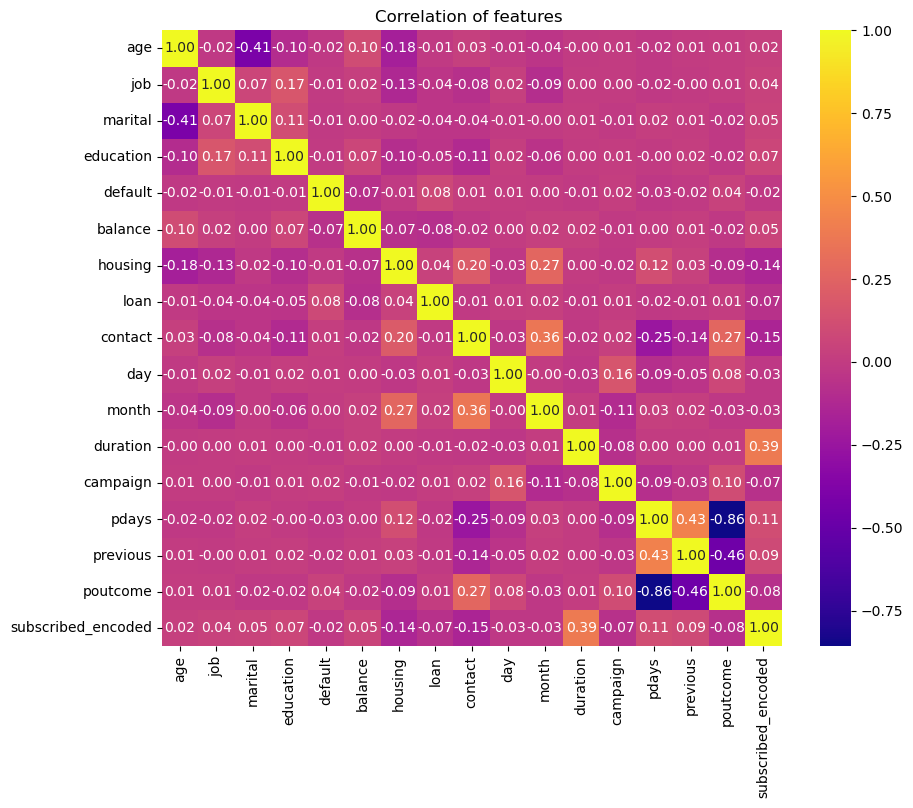

In [203]:
# correlation matrix

cm= bank_train_df2.corr()
plt.figure(figsize=(10,8))

sns.heatmap(cm, annot=True,cmap='plasma',fmt='.2f')
plt.title('Correlation of features ')
plt.show()

Observations:  

Previous campaign outcome has strong negative correlation with number of days that passed by after the client was last contacted and moderate negative correlation with number of contacts performed before this campaign  
Moderate positive correlation between the duration of the last contact and whether the client subscribed  



In [204]:
# find multicollinearity by vif

x=bank_train_df2.drop('subscribed_encoded',axis=1)
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

vif=pd.DataFrame()
vif['Features']=x.columns
vif['VIF']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif.sort_values(by='VIF',ascending=False)

,Features,VIF
15,poutcome,4.042436
13,pdays,3.850393
8,contact,1.321742
0,age,1.283253
14,previous,1.281110
10,month,1.249806
2,marital,1.222506
6,housing,1.191470
3,education,1.067258
12,campaign,1.055276


Observation:  
    
    There is no evidence for severe multicollinearity

In [205]:
# Feature selection using SelectKBest

x=bank_train_df2.drop('subscribed_encoded',axis=1)
y=bank_train_df2['subscribed_encoded']

best=SelectKBest(score_func=f_classif,k='all')
best_features=best.fit(x,y)
selectkbest=pd.DataFrame()
selectkbest['Features']=x.columns
selectkbest['Score']=best_features.scores_
print(selectkbest.sort_values(by='Score',ascending=False))

     Features        Score
11   duration  5671.062516
8     contact   728.909409
6     housing   642.748084
13      pdays   375.492162
14   previous   247.430356
15   poutcome   208.446461
7        loan   166.127429
12   campaign   158.549603
3   education   138.662064
5     balance    81.897908
2     marital    67.228362
1         job    48.010220
9         day    27.749526
10      month    24.986423
0         age    19.065588
4     default    12.876385


Observation:  
    
    We could select the top 10 features after selectkbest feature selection

In [206]:
bank_train_df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed_encoded
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,0
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,0
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,0
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,1
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,0


In [207]:
# splitting dataset into x and y sets

x= bank_train_df1[['duration', 'contact', 'housing', 'pdays', 'previous', 'poutcome', 'loan', 'campaign','education','balance']]

y = bank_train_df1['subscribed_encoded']


In [208]:
# define function to encode categorical_features by one hot encoding

def encode_categorical_features(df):
    
    categorical=df.select_dtypes(include='object')
    df = pd.get_dummies(df, columns=categorical.columns, dtype=int, drop_first=True)
    return df

In [209]:
encoded_x= encode_categorical_features(x)
encoded_x

,duration,pdays,previous,campaign,balance,contact_telephone,contact_unknown,housing_yes,poutcome_other,poutcome_success,poutcome_unknown,loan_yes,education_secondary,education_tertiary,education_unknown
0,44,-1,0,2,1933,1,0,0,0,0,1,0,0,0,1
1,91,-1,0,2,3,0,0,0,0,0,1,0,1,0,0
2,240,-1,0,1,891,0,0,1,0,0,1,0,1,0,0
3,867,84,3,1,3287,0,0,0,0,1,0,0,0,1,0
4,380,-1,0,1,119,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,116,-1,0,2,0,0,0,1,0,0,1,0,0,1,0
31643,438,-1,0,2,380,0,0,0,0,0,1,1,0,1,0
31644,37,-1,0,3,312,0,0,0,0,0,1,0,0,1,0
31645,22,337,12,7,225,1,0,1,0,0,0,0,1,0,0


In [210]:
# transforming training and testing sets

scaler = StandardScaler()
x_scaled =scaler.fit_transform(encoded_x)

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=67)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(23735, 15) (7912, 15) (23735,) (7912,)


<Axes: xlabel='subscribed_encoded', ylabel='count'>

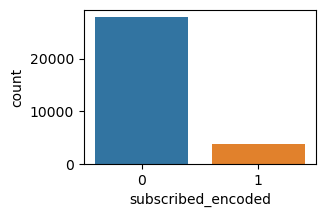

In [211]:
# checking for data imbalance
plt.figure(figsize=(3,2))
sns.countplot(x='subscribed_encoded',data=bank_train_df1)

In [212]:
bank_train_df1['subscribed_encoded'].value_counts()

subscribed_encoded
0    27932
1     3715
Name: count, dtype: int64

Observation:  
    
    There is significant imbalance in the dataset

In [213]:
# oversampling by SMOTE

from imblearn.over_sampling import SMOTE as smt
over=smt(random_state=78,k_neighbors=3,sampling_strategy='auto')
X_train,Y_train=over.fit_resample(x_train,y_train)

In [214]:
# check label distribution before and after oversampling
from collections import Counter

print('Label distribution before oversampling: ', Counter(y_train),'\n')

print('Label distribution after oversampling: ', Counter(Y_train))

Label distribution before oversampling:  Counter({0: 20934, 1: 2801}) 

Label distribution after oversampling:  Counter({0: 20934, 1: 20934})


Text(0.5, 1.0, 'Label distribution after oversampling')

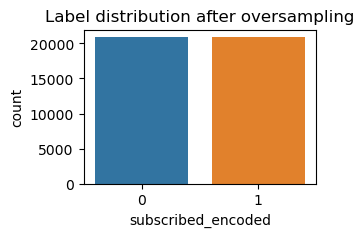

In [215]:
ytrain_df=pd.DataFrame(Y_train,columns=['subscribed_encoded'])
plt.figure(figsize=(3,2))
sns.countplot(x='subscribed_encoded', data=ytrain_df)
plt.title('Label distribution after oversampling')

Observation:  
    Now the dataset is balanced, and can be used for model building

# MODEL BUILDING & VALIDATION

In [216]:
# define functions for training and evaluation of models

def score(model,X_train,Y_train,x_test,y_test,train=True):
    if train:
        y_pred1= model.predict(X_train)
        print('Accuracy of train set: ',accuracy_score(Y_train,y_pred1))
    else:
        y_pred2= model.predict(x_test)
        print('Accuracy of test set: ',accuracy_score(y_test,y_pred2))
        print(f'\nClassification report of {model} model  :\n\n {classification_report(y_test,y_pred2,digits=2)}')
        
        plt.figure(figsize=(4,3))
        cnf_matrix=metrics.confusion_matrix(y_test,y_pred2)
        cnf_df=pd.DataFrame(cnf_matrix)
        sns.heatmap(cnf_df, annot=True, annot_kws={'size':12},cmap='YlGnBu',fmt='g')
        plt.title(f'Confusion matrix for {model} model')
        plt.xlabel('Predicted Subscription')
        plt.ylabel('Actual Subscription ')
        plt.show()
        
# cross-validation of the model
def cv(model):
    cv_score=cross_val_score(model,x_scaled,y,cv=5).mean()
    print (f'\nCross validation score of the {model} model : {cv_score}')

Accuracy of train set:  0.8136046622719022
Accuracy of test set:  0.8225480283114257

Classification report of LogisticRegression() model  :

               precision    recall  f1-score   support

           0       0.96      0.83      0.89      6998
           1       0.37      0.76      0.50       914

    accuracy                           0.82      7912
   macro avg       0.67      0.80      0.69      7912
weighted avg       0.90      0.82      0.85      7912



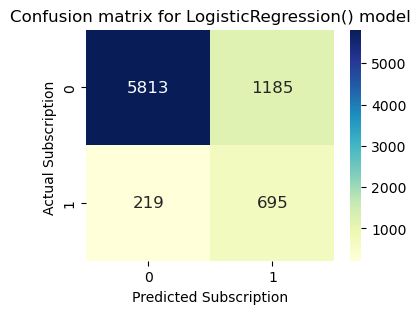


Cross validation score of the LogisticRegression() model : 0.8988845099053806


In [217]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

score(lr,X_train,Y_train,x_test,y_test,train=True)
score(lr,X_train,Y_train,x_test,y_test,train=False)

cv(lr)

Accuracy of train set:  0.9211808541129264
Accuracy of test set:  0.8097826086956522

Classification report of KNeighborsClassifier() model  :

               precision    recall  f1-score   support

           0       0.95      0.83      0.88      6998
           1       0.34      0.68      0.45       914

    accuracy                           0.81      7912
   macro avg       0.64      0.75      0.67      7912
weighted avg       0.88      0.81      0.83      7912



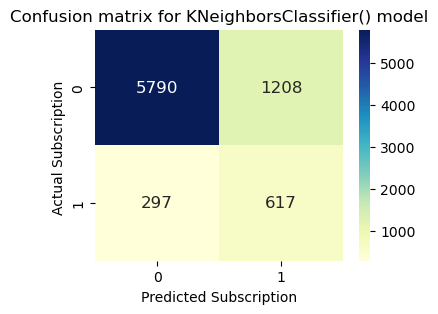


Cross validation score of the KNeighborsClassifier() model : 0.8899104875198971


In [218]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
score(knn,X_train,Y_train,x_test,y_test,train=True)
score(knn,X_train,Y_train,x_test,y_test,train=False)
cv(knn)

Accuracy of train set:  0.9998328078723607
Accuracy of test set:  0.8262133468149646

Classification report of DecisionTreeClassifier() model  :

               precision    recall  f1-score   support

           0       0.93      0.87      0.90      6998
           1       0.34      0.52      0.41       914

    accuracy                           0.83      7912
   macro avg       0.63      0.69      0.65      7912
weighted avg       0.86      0.83      0.84      7912



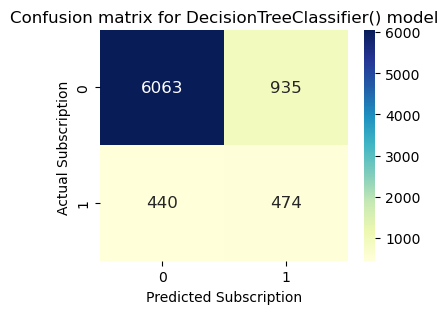


Cross validation score of the DecisionTreeClassifier() model : 0.8592600524629347


In [219]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

score(dt,X_train,Y_train,x_test,y_test,train=True)
score(dt,X_train,Y_train,x_test,y_test,train=False)
cv(dt)

Accuracy of train set:  0.999808923282698
Accuracy of test set:  0.8598331648129424

Classification report of RandomForestClassifier() model  :

               precision    recall  f1-score   support

           0       0.94      0.90      0.92      6998
           1       0.42      0.58      0.49       914

    accuracy                           0.86      7912
   macro avg       0.68      0.74      0.70      7912
weighted avg       0.88      0.86      0.87      7912



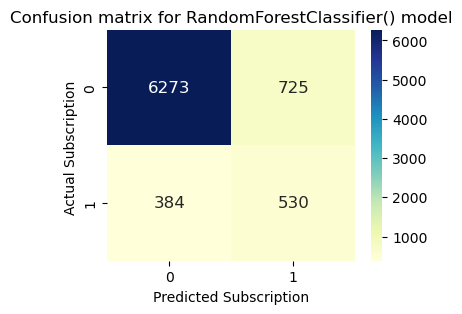


Cross validation score of the RandomForestClassifier() model : 0.8943028018422183


In [220]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

score(rf,X_train,Y_train,x_test,y_test,train=True)
score(rf,X_train,Y_train,x_test,y_test,train=False)
cv(rf)

Accuracy of train set:  0.8394239036973344
Accuracy of test set:  0.8018200202224469

Classification report of SVC(probability=True) model  :

               precision    recall  f1-score   support

           0       0.97      0.80      0.88      6998
           1       0.35      0.82      0.49       914

    accuracy                           0.80      7912
   macro avg       0.66      0.81      0.68      7912
weighted avg       0.90      0.80      0.83      7912



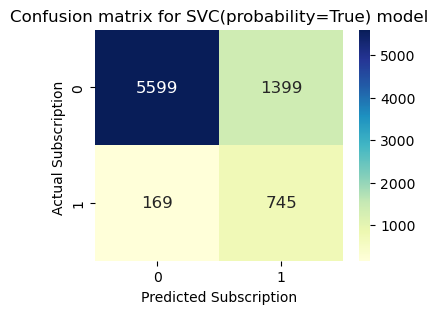


Cross validation score of the SVC(probability=True) model : 0.8982209578666571


In [221]:
# SVM
from sklearn.svm import SVC
svc=SVC(probability=True)
svc.fit(X_train,Y_train)

score(svc,X_train,Y_train,x_test,y_test,train=True)
score(svc,X_train,Y_train,x_test,y_test,train=False)
cv(svc)

Accuracy of train set:  0.8650042992261393
Accuracy of test set:  0.8259605662285137

Classification report of GradientBoostingClassifier() model  :

               precision    recall  f1-score   support

           0       0.97      0.83      0.89      6998
           1       0.38      0.79      0.51       914

    accuracy                           0.83      7912
   macro avg       0.67      0.81      0.70      7912
weighted avg       0.90      0.83      0.85      7912



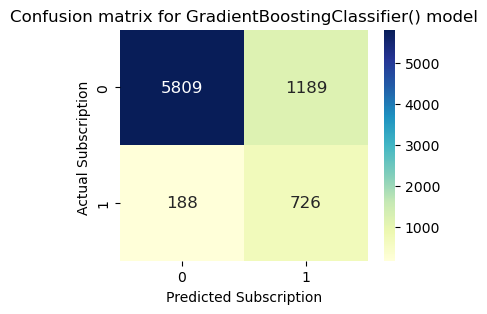


Cross validation score of the GradientBoostingClassifier() model : 0.9008751011230682


In [222]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)

score(gbc,X_train,Y_train,x_test,y_test,train=True)
score(gbc,X_train,Y_train,x_test,y_test,train=False)
cv(gbc)

Accuracy of train set:  0.9096445973058183
Accuracy of test set:  0.8507330637007078

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model  :

               precision    recall  f1-score   support

           0       0.96      0.87      0.91      6998
           1 

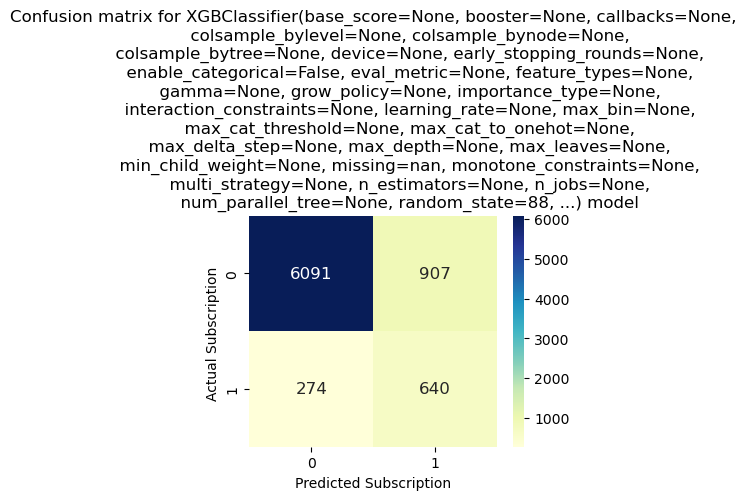


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model : 0.8998640526556334


In [223]:
# XGBoost
import xgboost as xgb
xg=xgb.XGBClassifier(random_state=88)
xg.fit(X_train,Y_train)

score(xg,X_train,Y_train,x_test,y_test,train=True)
score(xg,X_train,Y_train,x_test,y_test,train=False)
cv(xg)

F1 score of Logistic Regression model is  0.4974946313528991
F1 score of Decision Tree model is  0.42023346303501946
F1 score of KNN model is  0.4505293902884265
F1 score of Random Forest model is  0.4928472542685741
F1 score of Gradient Boosting model is  0.513255567338282
F1 score of XGBoost model is  0.5201137748882568


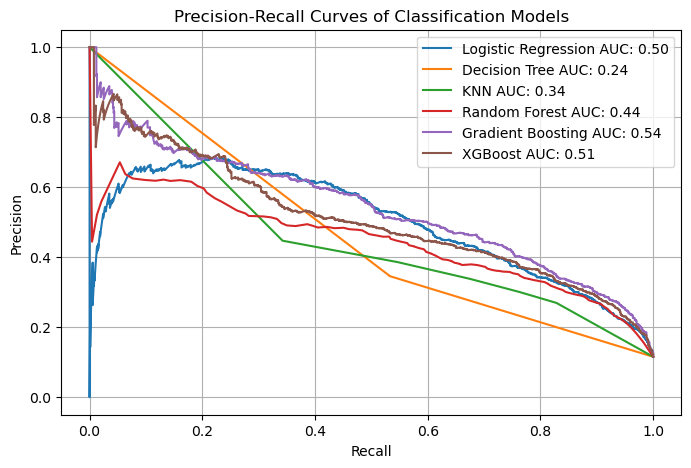

In [224]:
# precision-recall-curve

from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, average_precision_score

models = {'Logistic Regression': lr,'Decision Tree': dt,'KNN': knn, 'Random Forest': rf,
          'Gradient Boosting': gbc,'XGBoost': xg}


def pr_curve(data,x_test,y_test):
    
    plt.figure(figsize=(8,5))
    
    for name, model in models.items():
        
        model.fit(X_train,Y_train)
        y_pred=model.predict(x_test)
        y_prob=model.predict_proba(x_test)[:,1]
        fs=f1_score(y_test,y_pred)
        print(f'F1 score of {name} model is  {fs}')

    
        precision, recall,threshold = precision_recall_curve(y_test,y_prob)
        aps=average_precision_score(y_test,y_prob)
        plt.plot(recall, precision,label=f'{name} AUC: {aps:.2f}')

    
    plt.title('Precision-Recall Curves of Classification Models')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.grid(True)
    plt.legend(loc='best')   
    plt.show()

pr_curve(models,x_test,y_test)

Observations:  
    
    XGBoost model has the highest F1 score indicating that the model classify the good wines better than other models. Comparitively higher F1 score also tells us that the model has less false positives and false negatives than the others.   
    XGBoost model (brown curve) has the second highest AUC (0.51) in the precision recall plot and also the highest accuracy score of 85%.

    

In [225]:
# Hyperparameter tuning of the selected model (XGBoost) using GridSearchCV

from sklearn.model_selection import GridSearchCV

params={'n_estimators': [25,35,50], 'learning_rate':[0.01,0.05,0.1,0.5,1], 'max_depth':range(10,30,5)}

gs=GridSearchCV(estimator=xg,param_grid=params,scoring='accuracy',cv=5)

gs.fit(X_train,Y_train)

print(f'Best parameters for Random Forest model: {gs.best_params_} and best score is : {gs.best_score_}')

Best parameters for Random Forest model: {'learning_rate': 0.5, 'max_depth': 25, 'n_estimators': 50} and best score is : 0.90484445508213


Accuracy of train set:  0.9984952708512468
Accuracy of test set:  0.8555358948432761

Classification report of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model  :

               precision    recall  f1-score   support

           0       0.94      0.89      0.92      6998
           1      

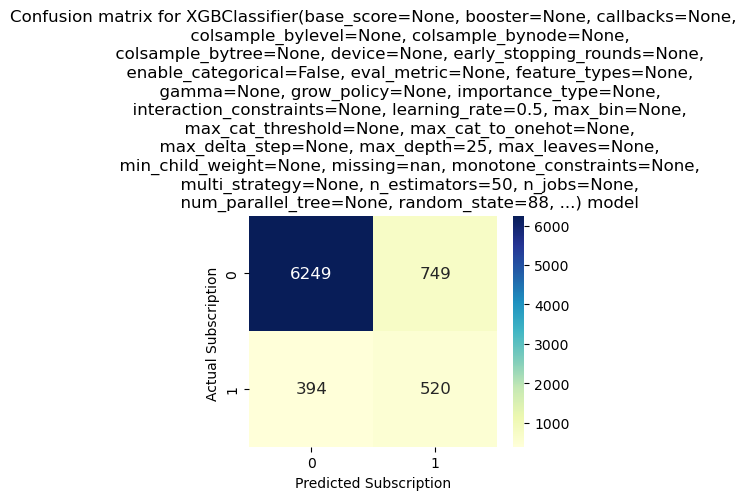


Cross validation score of the XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=88, ...) model : 0.888330758610843


In [226]:
# Tuned XGBoost

xg1=gs.best_estimator_
xg1.fit(X_train,Y_train)

score(xg1,X_train,Y_train,x_test,y_test,train=True)
score(xg1,X_train,Y_train,x_test,y_test,train=False)
cv(xg1)

Observation:   

    Number of false negatives detected decreased from 394 to 274 after hp tuning.  
    Accuracy of test set increased from 80% to 85.5%.

In [227]:
# save model

pickle.dump(xg1,open('Bank_subscription_xg1.pkl','wb'))

# Testing the selected model with test data

In [228]:
# load test data

bank_test_df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
bank_test_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [229]:
bank_test_df.shape

(13564, 17)

In [241]:
x_test = bank_test_df[['duration', 'contact', 'housing', 'pdays', 'previous', 'poutcome', 'loan', 'campaign','education','balance']]
x_test.head()

,duration,contact,housing,pdays,previous,poutcome,loan,campaign,education,balance
0,20,cellular,yes,-1,0,unknown,no,6,secondary,118
1,372,telephone,no,-1,0,unknown,no,1,primary,2787
2,676,unknown,yes,-1,0,unknown,no,1,tertiary,144
3,65,telephone,yes,-1,0,unknown,no,2,primary,3777
4,111,unknown,no,-1,0,unknown,yes,1,secondary,-705


In [243]:
# encode categorical features in test dataset

encoded_test= encode_categorical_features(x_test)
encoded_test.head()

,duration,pdays,previous,campaign,balance,contact_telephone,contact_unknown,housing_yes,poutcome_other,poutcome_success,poutcome_unknown,loan_yes,education_secondary,education_tertiary,education_unknown
0,20,-1,0,6,118,0,0,1,0,0,1,0,1,0,0
1,372,-1,0,1,2787,1,0,0,0,0,1,0,0,0,0
2,676,-1,0,1,144,0,1,1,0,0,1,0,0,1,0
3,65,-1,0,2,3777,1,0,1,0,0,1,0,0,0,0
4,111,-1,0,1,-705,0,1,0,0,0,1,1,1,0,0


In [244]:
# scale the encoded features before prediction

x_test_scaled =scaler.fit_transform(encoded_test)

In [257]:
# predict subscription with x_test_scaled using tuned XGBoost model

Bank_subscription_model=pickle.load(open('Bank_subscription_xg1.pkl','rb'))
y_pred=Bank_subscription_model.predict(x_test_scaled)

In [258]:
# decode the predictions

y_pred_decoded=[]
for i in y_pred:
    if i==1:
        y_pred_decoded.append('Yes')
    else:
        y_pred_decoded.append('No')

In [259]:
# make a dataframe with client id and predictions of whether the client will subscribe for term deposit or not?

y_pred_df=pd.DataFrame()
y_pred_df['ID']=bank_test_df['ID'].values
y_pred_df['Subscribe for term deposit or not?']=y_pred_decoded
y_pred_df.head()

,ID,Subscribe for term deposit or not?
0,38441,No
1,40403,Yes
2,3709,No
3,37422,No
4,12527,No


# Overall Summary

The dataset on "Bank Marketing" was used to analyse and build machine learning models (binary classification) to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not 

# Data Insights

    Majority bank accounts are held by clients who are employed in blue-collar and management job types.    
    Married clients are found to be holding more accounts than single/divorced clients.    
    People with secondary education holds most of the bank accounts.  
    Majority clients have no credit in default.  
    Housing loans are more common than personal loans.      
    Highest number of calls were made in the month of May.  
    Its difficult to analyse the outcome of the previous marketing campaign as it failed to capture data effectively.  
    Majority clients have not subscribed to a term deposit.
    Majority of the clients fall in the younger age (32 years old)    
    Most calls to the clients were made on 20th  
    The call duration was not much longer in most of the cases (majority calls were completed in 90 seconds)  
    Clients were mostly contacted once during this campaign    
    Most of the clients were not contacted before this campaign 
    Subscription pattern is similar across both genders   
    Clients with more bank balance tends to subscribe to term deposit more  
    Subscription show no particular trends with day of contacting the client  
    Clients with subscription tend to have longer call duration compared to those who didnt have subscription  
    The clients with subscriptions were contacted less frequently during and after the campaign  
    The clients with subscriptions were contacted more frequently before the campaign
    Students have more subscription to term deposits followed by retired people. Blue-collared employees have the least number of subscriptions even though they hold the maximum number of bank accounts  
    Single clients have more subscription to term deposits than married clients  
    Clients with tertiary education have more subscriptions
    Clients with no credit defaults have more subscriptions  
    Clients with no housing and personal loans have more subscriptions  
    Clients who were contacted on March have the most subscriptions   
    Larger proportion of clients who were contacted for the campaign has successfully subscribed to term deposits 


# Selected model

XGBoost (xg1) model is found to be the best model among the 6 models for this classification task with:

   * Accuracy: 0.855
   * Cross Validation: 0.888
